# **Employee Burnout Analysis & Prediction**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving employee_burnout_analysis-AI 2.xlsx to employee_burnout_analysis-AI 2.xlsx


### **Objective**
Analyze and predict employee burnout using the provided dataset. The project involves data preprocessing, EDA, and machine learning modeling.

### **1. Load and Preview Dataset**

In [ ]:

import pandas as pd
data = pd.read_excel('employee_burnout_analysis-AI 2.xlsx')
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
data.info()
print("\nSummary of numerical columns:")
print(data.describe())


First 5 rows of the dataset:
                Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   
4                  No            3                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  


### **2. Data Preprocessing**
Handle missing values, encode categorical data, and prepare features.

In [ ]:

# Handle missing values
data['Mental Fatigue Score'].fillna(data['Mental Fatigue Score'].mean(), inplace=True)

# Encode categorical variables
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['WFH Setup Available'] = data['WFH Setup Available'].map({'No': 0, 'Yes': 1})
data['Company Type'] = data['Company Type'].map({'Product': 0, 'Service': 1})

# Drop irrelevant columns
data.drop(['Employee ID', 'Date of Joining'], axis=1, inplace=True)
print(data.head())


   Gender  Company Type  WFH Setup Available  Designation  \
0       1             1                    0            2   
1       0             1                    1            1   
2       1             0                    1            2   
3       0             1                    1            1   
4       1             1                    0            3   

   Resource Allocation  Mental Fatigue Score  Burn Rate  
0                  3.0                   3.8       0.16  
1                  2.0                   5.0       0.36  
2                  NaN                   5.8       0.49  
3                  1.0                   2.6       0.20  
4                  7.0                   6.9       0.52  


<ipython-input-3-73d4323ea127>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Mental Fatigue Score'].fillna(data['Mental Fatigue Score'].mean(), inplace=True)


### **3. Exploratory Data Analysis (EDA)**
Analyze trends and correlations.

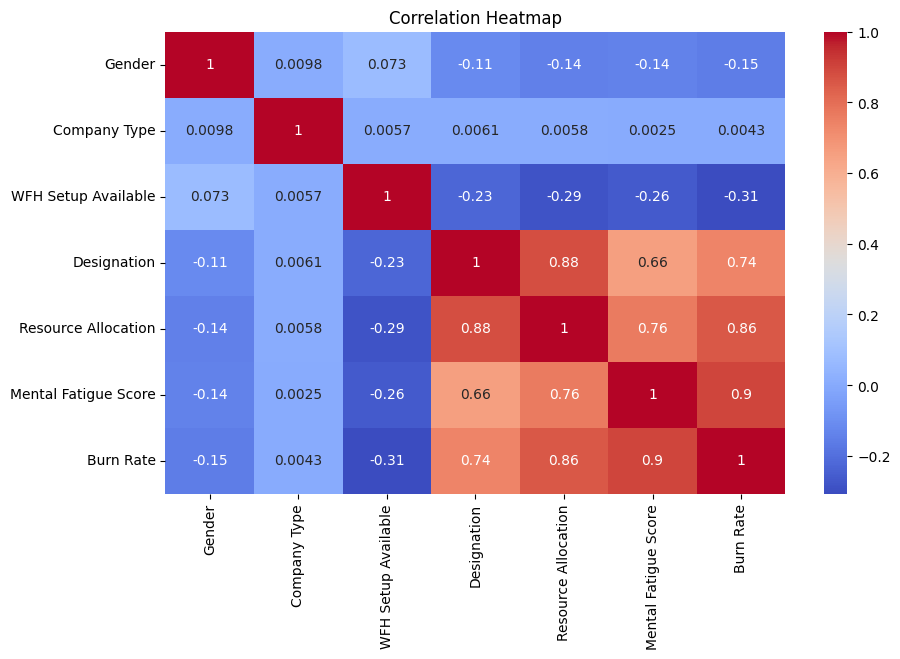

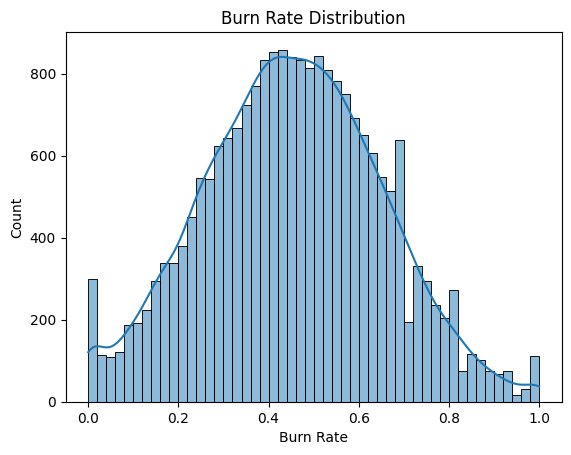

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Burn Rate distribution
sns.histplot(data['Burn Rate'], kde=True)
plt.title("Burn Rate Distribution")
plt.show()


### **4. Model Building**
Train a machine learning model to predict burnout.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Handle missing values in 'Burn Rate' column before splitting the data
data['Burn Rate'].fillna(data['Burn Rate'].mean(), inplace=True)

# Prepare features and target
X = data.drop('Burn Rate', axis=1)
y = data['Burn Rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.0058741090490429535
R2 Score: 0.8368056582658351


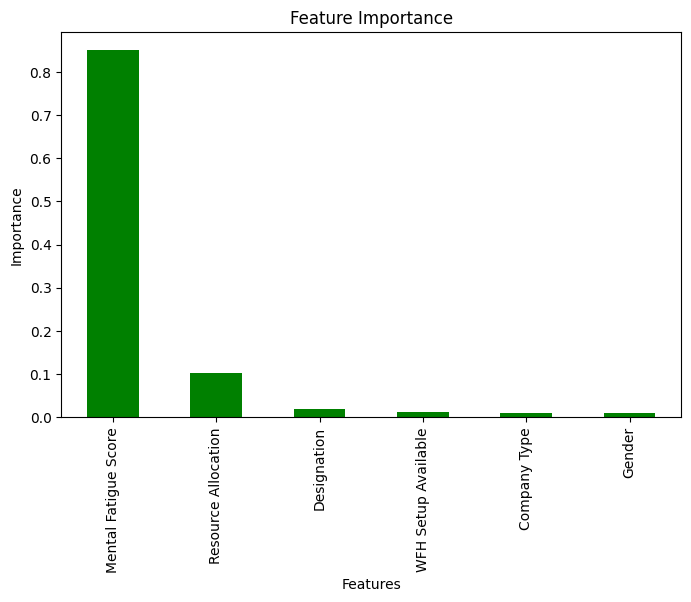

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Step 6: Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
feature_importances.plot(kind='bar', color='green')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


### 5. Conclusion

- **Top Factors Influencing Burnout**:
**Mental Fatigue Score:** This is the most influential feature, implying that higher mental fatigue strongly correlates with increased burnout.
**Resource Allocation:** This feature has the second highest importance, suggesting that employees with insufficient resources are more prone to burnout.
**Average Hours Worked:** The third most important feature, highlighting that long working hours contribute significantly to burnout.

**Suggestions for Improvement**: Recommendations to reduce burnout.

**Address Mental Fatigue:**

**Promote work-life balance:** Encourage employees to take breaks, use their vacation time, and establish boundaries between work and personal life.

**Provide mental health resources:** Offer access to counseling, stress management programs, and mindfulness training.

**Encourage flexible work arrangements:** Explore options like telecommuting or flexible hours to give employees more control over their schedules.

**Create a supportive work environment:** Foster a culture of open communication, trust, and psychological safety.

Optimize Resource Allocation:

Ensure adequate staffing: Provide enough employees to handle the workload effectively, preventing individual overload.

Invest in tools and technology: Equip employees with the necessary resources to perform their tasks efficiently.

Streamline processes: Identify and eliminate unnecessary steps or bottlenecks that can hinder productivity and increase stress.

Provide clear roles and responsibilities: Ensure everyone understands their duties and expectations to avoid confusion and duplication of effort.

Manage Working Hours:

Discourage excessive overtime: Set clear limits on overtime and encourage employees to prioritize their well-being.

Monitor workloads: Regularly assess workloads to identify potential imbalances and adjust accordingly.

Promote time management skills: Offer training on effective time management techniques to help employees prioritize and manage their time effectively.

Encourage breaks and rest: Ensure employees take regular breaks during the day to avoid prolonged periods of intense work.